<a href="https://colab.research.google.com/github/wjdsheep15/AIStudy/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 타이타닉 EDA - 탐색적 데이터 분석

In [ ]:
pip list

- 코랩 한글 폰트 설치 과정 1단계: 아래의 코딩 실행

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 10s (1,076 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and dir

- 한글 폰트 설치 2단계 : 런타임 다시시작

- 한글 폰트 설치 3단계 : 다음 코딩 실행
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font', family='NanumBarunGothic')
import warnings # 출력창에서 경고문구를 무시
warnings.filterwarnings('ignore')

그래프에 마이너스 값 표시를 위한 추가 코딩 실행

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
d= sns.load_dataset('titanic')
d

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- 타이타닉 데이터 기술 통계량
- 기술 통계량 이란? 분석하고자 하는 데이터의 해당 column을 대표할 수 있는 통계값들을 의미

In [ ]:
d.describe() #중요한 함수

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
d.groupby('alive').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
alive,,,,,,,,,,,,,,
no,549,549,549,424,549,549,549,549,549,549,549,67,549,549
yes,342,342,342,290,342,342,342,340,342,342,342,136,340,342


In [ ]:
d.groupby('alive')['alive'].count()

alive
no     549
yes    342
Name: alive, dtype: int64

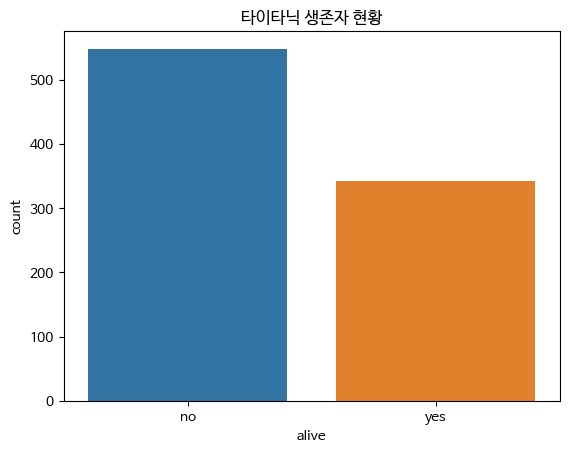

In [ ]:
sns.countplot(x='alive', data=d)
plt.title('타이타닉 생존자 현황')
plt.show()

In [ ]:
d.groupby(['sex', 'alive'])['alive'].count()

sex     alive
female  no        81
        yes      233
male    no       468
        yes      109
Name: alive, dtype: int64

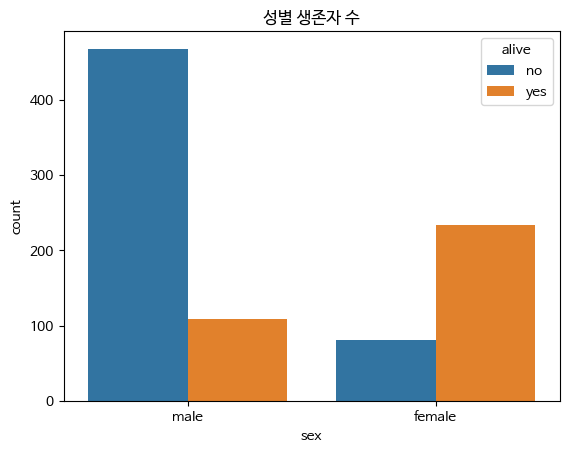

In [ ]:
sns.countplot(x='sex', hue='alive', data=d)
plt.title('성별 생존자 수')
plt.show()

In [ ]:
d.groupby('sex')['sex', 'survived'].mean()

,survived
sex,
female,0.742038
male,0.188908


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['survived'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['survived'], **{})
chart

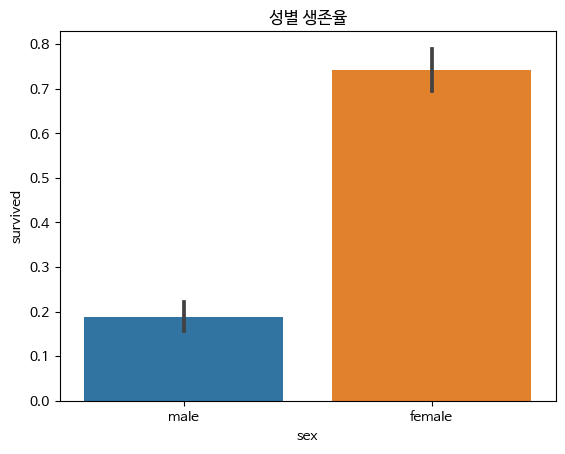

In [ ]:
sns.barplot(data=d, x='sex', y='survived')
plt.title('성별 생존율')
plt.show()

In [ ]:
d.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


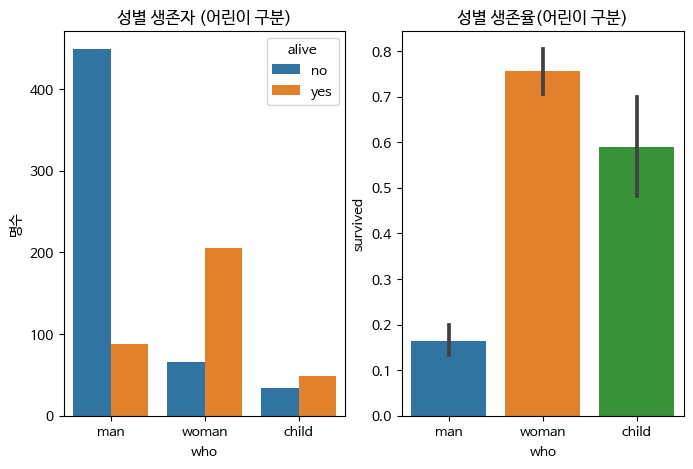

In [ ]:
f, ax = plt.subplots(1,2,figsize=(8,5))
sns.countplot(x = 'who', hue = 'alive', data=d, ax= ax[0])
ax[0].set_title('성별 생존자 (어린이 구분)')
ax[0].set_ylabel('명수')

sns.barplot(data=d, x='who', y='survived', ax=ax[1])
ax[1].set_title('성별 생존율(어린이 구분)')
plt.show()

In [ ]:
d['age'].isnull().sum()

177

In [ ]:
d['deck'].isnull().sum()

688

'age' 필드의 결측치를 어린이, 성인남자, 성인여자의 평균 나이로 채우기

In [ ]:
d.loc[(d['age'].insull())&(d['who']=='child'), 'age'] = 6
d.loc[(d['age'].insull())&(d['who']=='man'), 'age'] = 33
d.loc[(d['age'].insull())&(d['who']=='woman'), 'age'] = 32